In [103]:
from Chemometrics.basic import pload,plot_ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'

In [17]:
data = pload('./地沟油红外数据及标签.p')
ir = data['IR']
desc = data['descriptions']
labels = desc['地沟油含量']
label_ = ~labels.isnull()
rseed = 1

---
- train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
                                   ir, label_, random_state=rseed)

---
- fit the model

In [19]:
params = {'n_neighbors':range(3,10)}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf,param_grid=params,
                    cv=StratifiedKFold(5,random_state=rseed)).fit(X_train,y_train)

    - fitness

拟合F1 score为0.835820895522388


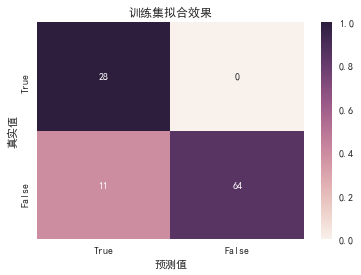

In [59]:
fits = grid.predict(X_train)
cm_train = confusion_matrix(y_train,fits,y_train.unique())
plot_ConfusionMatrix(cm_train,y_train.unique())
plt.title('训练集拟合效果')
f1_train = f1_score(y_train,fits)
print('拟合F1 score为{}'.format(f1_train))

---
- evaluate the model

In [36]:
preds = grid.predict(X_test)
f1 = f1_score(y_test,preds)
cm = confusion_matrix(y_test,preds,y_test.unique())
acc = accuracy_score(y_test,preds)
print('F1 score为{},准确率accuracy为{}'.format(f1,acc))

F1 score为0.6399999999999999,准确率accuracy为0.7428571428571429


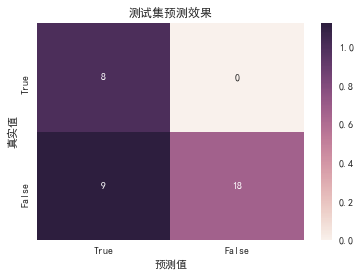

In [60]:
plot_ConfusionMatrix(cm,y_test.unique())
plt.title('测试集预测效果')

# error analysis

In [44]:
#False negative预测不是地沟油，而实际是地沟油的样本
desc.loc[y_test.index[(preds == False) & (y_test.values ==True)].unique(),:]

,品牌,分类,工艺,转基因,备注,种类,地沟油含量
编号,,,,,,,


In [46]:
# False positive 预测为地沟油，而实不是地沟油的样本
desc.loc[y_test.index[(preds == True) & (y_test.values ==False)].unique(),:]

,品牌,分类,工艺,转基因,备注,种类,地沟油含量
编号,,,,,,,
Y-322,鲁花,花生油,压榨,-,NaN,花生油,NaN
Y-322,鲁花,花生油,压榨,-,NaN,花生油,NaN
Y-322,鲁花,花生油,压榨,-,NaN,花生油,NaN
Y-084,NaN,玉米油-1,NaN,NaN,NaN,玉米油,NaN
Y-084,NaN,玉米油-1,NaN,NaN,NaN,玉米油,NaN
Y-084,NaN,玉米油-1,NaN,NaN,NaN,玉米油,NaN
Y-252,NaN,玉米油-2,NaN,NaN,NaN,玉米油,NaN
Y-252,NaN,玉米油-2,NaN,NaN,NaN,玉米油,NaN
Y-252,NaN,玉米油-2,NaN,NaN,NaN,玉米油,NaN


---
- 盲样的正确率

In [80]:
blinds = desc[desc['品牌'].isnull()]

F1 score为0.6956521739130436,准确率accuracy为0.5882352941176471


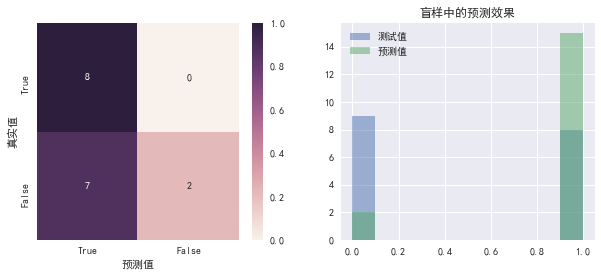

In [165]:
blinds_test = y_test[y_test.index.isin(blinds.index)]
blinds_test_preds = preds[y_test.index.isin(blinds.index)]
f1 = f1_score(blinds_test,blinds_test_preds)
cm = confusion_matrix(blinds_test,blinds_test_preds,blinds_test.unique())
acc = accuracy_score(blinds_test,blinds_test_preds)
print('F1 score为{},准确率accuracy为{}'.format(f1,acc))
plt.rcParams['figure.figsize'] = 10,4
plt.subplot(121)
plot_ConfusionMatrix(cm,blinds_test.unique())
a = pd.DataFrame([blinds_test.values,blinds_test_preds],columns=blinds_test.index,index=['测试值','预测值'])
a = a.T
plt.subplot(122)
for col in a.columns:
    plt.hist(a[col],alpha=.5, label=col)
plt.legend()
plt.title('盲样中的预测效果')

- 盲样拟合效果

F1 score为0.8750000000000001,准确率accuracy为0.7837837837837838


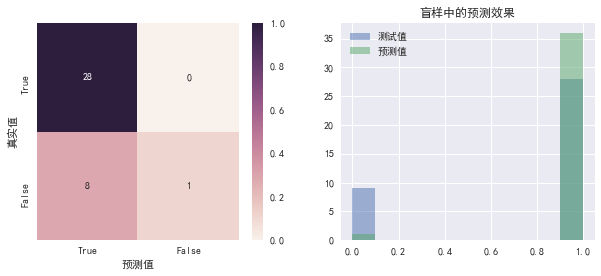

In [166]:
y_test = y_train
preds= fits
blinds_test = y_test[y_test.index.isin(blinds.index)]
blinds_test_preds = preds[y_test.index.isin(blinds.index)]
f1 = f1_score(blinds_test,blinds_test_preds)
cm = confusion_matrix(blinds_test,blinds_test_preds,blinds_test.unique())
acc = accuracy_score(blinds_test,blinds_test_preds)
print('F1 score为{},准确率accuracy为{}'.format(f1,acc))
plt.rcParams['figure.figsize'] = 10,4
plt.subplot(121)
plot_ConfusionMatrix(cm,blinds_test.unique())
a = pd.DataFrame([blinds_test.values,blinds_test_preds],columns=blinds_test.index,index=['测试值','预测值'])
a = a.T
plt.subplot(122)
for col in a.columns:
    plt.hist(a[col],alpha=.5, label=col)
plt.legend()
plt.title('盲样中的预测效果')

- 盲样和地沟油样的相关度

In [226]:
from  collections import Counter
pct = sum(~blinds['地沟油含量'].isnull())/len(blinds)
print('盲样中地沟油比例为{}%'.format(round(pct*100,2)))

盲样中地沟油比例为66.67%
